In [ ]:
import numpy as np
import string
from nltk.corpus import stopwords

In [ ]:
def softmax(x):
	"""Compute softmax values for each sets of scores in x."""
	e_x = np.exp(x - np.max(x))
	return e_x / e_x.sum()


In [ ]:
class word2vec(object):
    def __init__(self):
        self.N = 10
        self.X_train = []
        self.y_train = []
        self.window_size = 2
        self.alpha = 0.0001
        self.words = []
        self.word_index = {}

    def initialize(self,V,data):
        self.V = V
        self.W = np.random.uniform(-0.8, 0.8, (self.V, self.N))
        self.W1 = np.random.uniform(-0.8, 0.8, (self.N, self.V))

        self.words = data
        for i in range(len(data)):
            self.word_index[data[i]] = i


    def feed_forward(self,X):
        self.h = np.dot(self.W.T,X).reshape(self.N,1)
        self.u = np.dot(self.W1.T,self.h)
        #print(self.u)
        self.y = softmax(self.u)
        return self.y

    def backpropagate(self,x,t):
        e = self.y - np.asarray(t).reshape(self.V,1)
        # e.shape is V x 1
        dLdW1 = np.dot(self.h,e.T)
        X = np.array(x).reshape(self.V,1)
        dLdW = np.dot(X, np.dot(self.W1,e).T)
        self.W1 = self.W1 - self.alpha*dLdW1
        self.W = self.W - self.alpha*dLdW

    def train(self,epochs):
        loss_list = []
        for x in range(1,epochs):
            self.loss = 0
            for j in range(len(self.X_train)):
                self.feed_forward(self.X_train[j])
                self.backpropagate(self.X_train[j],self.y_train[j])
                C = 0
                for m in range(self.V):
                    if(self.y_train[j][m]):
                        self.loss += -1*self.u[m][0]
                        C += 1
                self.loss += C*np.log(np.sum(np.exp(self.u)))
            print("epoch ",x, " loss = ",self.loss)
            loss_list.append(self.loss)
            self.alpha *= 1/( (1+self.alpha*x) )
        return loss_list

    def predict(self,word,number_of_predictions):
        if word in self.words:
            index = self.word_index[word]
            X = [0 for i in range(self.V)]
            X[index] = 1
            prediction = self.feed_forward(X)
            output = {}
            for i in range(self.V):
                output[prediction[i][0]] = i

            top_context_words = []
            for k in sorted(output,reverse=True):
                top_context_words.append(self.words[output[k]])
                if(len(top_context_words)>=number_of_predictions):
                    break

            return top_context_words
        else:
            print("Word not found in dictionary")

In [ ]:
def preprocessing(corpus):
	stop_words = set(stopwords.words('english'))
	training_data = []
	sentences = corpus.split(".")
	for i in range(len(sentences)):
		sentences[i] = sentences[i].strip()
		sentence = sentences[i].split()
		x = [word.strip(string.punctuation) for word in sentence
									if word not in stop_words]
		x = [word.lower() for word in x]
		training_data.append(x)
	return training_data

In [ ]:
def prepare_data_for_training(sentences,w2v):
	data = {}
	for sentence in sentences:
		for word in sentence:
			if word not in data:
				data[word] = 1
			else:
				data[word] += 1
	V = len(data)
	data = sorted(list(data.keys()))
	vocab = {}
	for i in range(len(data)):
		vocab[data[i]] = i

	#for i in range(len(words)):
	for sentence in sentences:
		for i in range(len(sentence)):
			center_word = [0 for x in range(V)]
			center_word[vocab[sentence[i]]] = 1
			context = [0 for x in range(V)]

			for j in range(i-w2v.window_size,i+w2v.window_size):
				if i!=j and j>=0 and j<len(sentence):
					context[vocab[sentence[j]]] += 1
			w2v.X_train.append(center_word)
			w2v.y_train.append(context)
	w2v.initialize(V,data)

	return w2v.X_train,w2v.y_train

In [ ]:
corpus = ""
corpus += "Movies are great. But amusement parks are fun!"
epochs = 10000

training_data = preprocessing(corpus)
w2v = word2vec()

prepare_data_for_training(training_data,w2v)
#w2v.train(epochs)
loss = w2v.train(epochs)

print(w2v.predict("but",3))


Streaming output truncated to the last 5000 lines.
epoch  5001  loss =  19.23857238458837
epoch  5002  loss =  19.238570405950362
epoch  5003  loss =  19.238568428103353
epoch  5004  loss =  19.238566451046886
epoch  5005  loss =  19.238564474780464
epoch  5006  loss =  19.238562499303622
epoch  5007  loss =  19.238560524615895
epoch  5008  loss =  19.238558550716803
epoch  5009  loss =  19.238556577605873
epoch  5010  loss =  19.238554605282637
epoch  5011  loss =  19.23855263374663
epoch  5012  loss =  19.238550662997362
epoch  5013  loss =  19.238548693034378
epoch  5014  loss =  19.238546723857198
epoch  5015  loss =  19.238544755465362
epoch  5016  loss =  19.2385427878584
epoch  5017  loss =  19.23854082103583
epoch  5018  loss =  19.2385388549972
epoch  5019  loss =  19.238536889742022
epoch  5020  loss =  19.238534925269846
epoch  5021  loss =  19.238532961580194
epoch  5022  loss =  19.238530998672605
epoch  5023  loss =  19.23852903654661
epoch  5024  loss =  19.2385270752017

Text(0, 0.5, 'Loss')

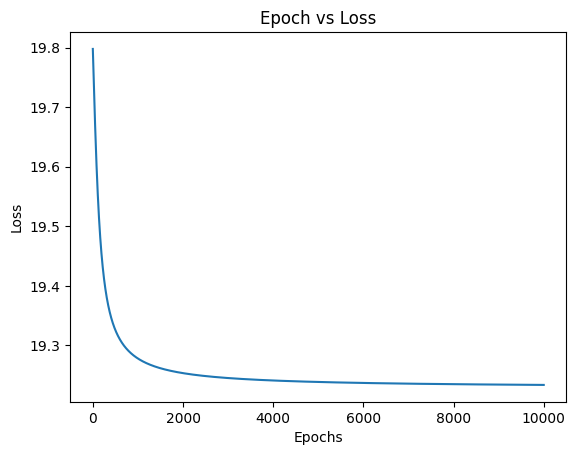

In [ ]:
import matplotlib.pyplot as plt
plt.plot(loss)
plt.title("Epoch vs Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")